In [1]:
import pandas as pd

import pickle
import easydict
import matplotlib.pyplot as plt


fileRAPzs = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/RAP2/dataset_zs_run0.pkl'

f = open(fileRAPzs, 'rb+')

dataset = pickle.load(f)

tablaAll = pd.read_csv("tablaAll.csv")

listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

maxAttributes = len(listAttributesRAPzs)
listTrainingCount = dataset.label[dataset.partition.train][:,:maxAttributes].sum(axis=0).tolist()
listTestingCount = dataset.label[dataset.partition.test][:,:maxAttributes].sum(axis=0).tolist()

tablaAll['training count'] = listTrainingCount
tablaAll['testing count'] = listTestingCount
tablaAll.sort_values(by='perfo testing (F1)')

,Unnamed: 0,attribute,perfo training (F1),perfo testing (F1),training count,testing count
0,0,hs-BaldHead,0.853211,0.000000,105,6
24,24,shoes-Cloth,0.704358,0.000000,239,25
14,14,ub-Others,0.000000,0.000000,32,6
26,26,shoes-Other,0.000010,0.000000,7,2
53,53,action-Other,0.319444,0.000010,99,16
49,49,action-Pushing,0.831655,0.083333,231,18
51,51,action-CarryingByArm,0.775956,0.158273,382,89
46,46,action-Talking,0.514571,0.177966,552,155
40,40,BodyFat,0.833797,0.283630,2703,766
42,42,BodyThin,0.767143,0.293465,1690,488


/tmp/ipykernel_1940081/1146120787.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  newAttribute = attribute + ' - ' + str(int(count))


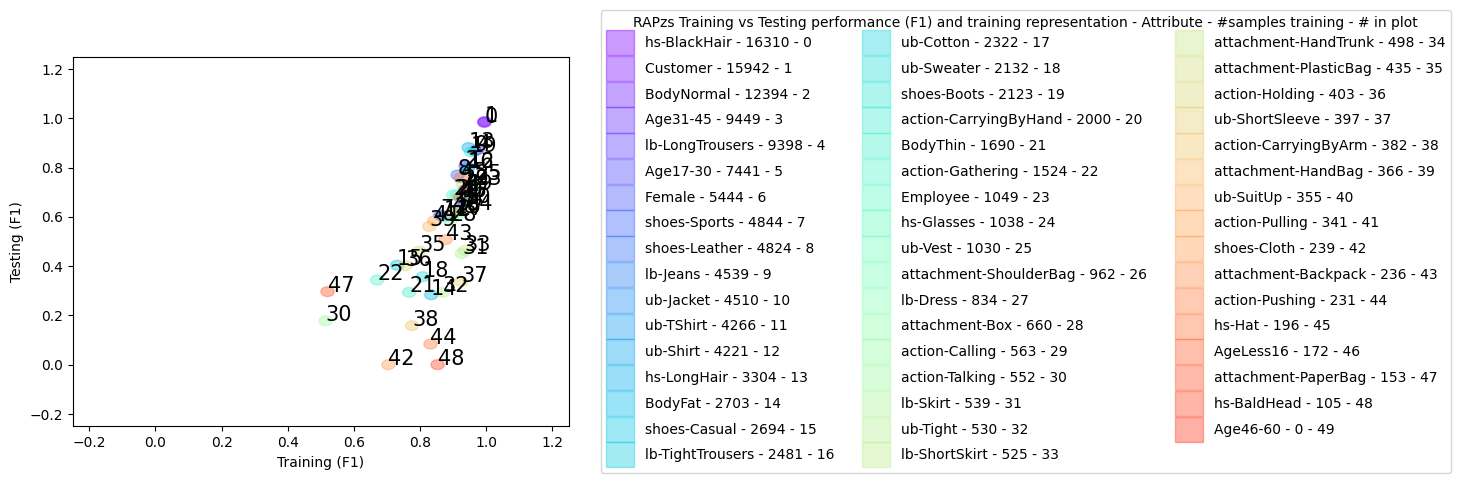

In [4]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 1.0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



listText = []
circlesList = []
cont = 0
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    
    if 'Other' not in attribute:
        x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
        y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
        count = tablaAll[tablaAll['attribute']==attribute]['training count']
        newAttribute = attribute + ' - ' + str(int(count))
        count = division * count
        c = next(color)

        #plt.plot([xText, x], [yText, y], '-', color=c, linewidth = '0.2')
        
        plt.text(x.values[0], y.values[0], str(cont), fontsize=15)

        circle = plt.Circle((x.values[0], y.values[0]), 0.02, color=c, alpha=0.4, label=newAttribute+" - "+str(cont))
        
        circlesList.append(circle)
        cont += 1


for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance (F1) and training representation - Attribute - #samples training - # in plot'
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='medium', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training (F1)')
plt.ylabel('Testing (F1)')
#plt.show()
plt.savefig('rapzstestingtraining.svg', bbox_inches='tight')